<a href="https://colab.research.google.com/github/ajayn3300/Shoes_Reccomender-Reverse_Image_Search----CNN-Transfer_Learning-/blob/main/shoe_recommender_cnn_transfer_learning_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shoes Recommender -(CNN|Transfer_learning)
    ~ This CNN based recommender system takes image of a shoe as input and recommends 5 similar shoes . 

# Importing dataset from Kaggle API

In [1]:
#intalling kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#create dir
!mkdir  ~/.kaggle

In [5]:
# copying jason to the dir that we just made.
!cp /content/kaggle.json  ~/.kaggle

In [6]:
#chanigng permission of that jason
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#let's download dataset
!kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

 98% 46.0M/47.0M [00:02<00:00, 35.7MB/s]
100% 47.0M/47.0M [00:02<00:00, 22.6MB/s]


In [9]:
#let's unzip the Dataset
!unzip /content/shoe-vs-sandal-vs-boot-dataset-15k-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (10).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (100).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1000).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1001).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1002).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1003).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1004).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1005).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1006).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1007).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1008).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1009).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (101).jpg  
  inflating: Shoe 

#Import Libraries


In [18]:
#libraies
import os
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
import numpy as np

from sklearn.neighbors import NearestNeighbors 
import matplotlib.pyplot as plt
import cv2
import pickle

**Saving paths of all the images :**

In [12]:
# saving paths 
paths=[]
for i in os.listdir('/content/Shoe vs Sandal vs Boot Dataset'):
    for j in glob.glob('/content/Shoe vs Sandal vs Boot Dataset/'+i+'/*.jpg'):
        paths.append(j)

In [13]:
# check
len(paths)

15000

# Now we will use Transfer Learning 
    
    ~ Here we will take all the layers from VGG16 model which is already trained on imagenet and we will freeze the weights of that model. 

In [14]:
#let's take layers from VGG16
model=tf.keras.Sequential()

vgg=VGG16(input_shape=(320,320,3),include_top=False)

model.add(vgg)
model.add(tf.keras.layers.Flatten())

58889256/58889256 [==============================] - 2s 0us/step


In [15]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 10, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [16]:
# freezing_graphs
model.trainable=False

In [17]:
# let's get all the features by making prediction with our model which will output feature vector
features=[]

for i in paths:
    #loading image with target size as per model
    img=image.load_img(i,target_size=(320,320,3))
    
    #converting into array
    img=image.img_to_array(img)
    
    # converting single image into batch of single image
    img=np.expand_dims(img,axis=0)
    
    
    # let's get feature vector (predict)
    feature=model.predict(img).flatten()   
    
    #normalizing feature vector
    feature=feature/np.linalg.norm(feature)
    
    features.append(feature)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 19ms/step


In [19]:
#calculating similarities
neighbors=NearestNeighbors(n_neighbors=5,algorithm='brute',metric='cosine')

#fit
neighbors.fit(features)

NearestNeighbors(algorithm='brute', metric='cosine')

In [20]:
# Now let's make recommender 
def recommend_shoe(la):
    img=image.load_img(la,target_size=(320,320,3))
    
    #converting into array
    img=image.img_to_array(img)
    
    # converting single image into batch of single image
    img=np.expand_dims(img,axis=0)
    
    
    # let's get feature vector (predict)
    feature=model.predict(img).flatten()

    #norm
    feature=feature/np.linalg.norm(feature)
    
    #getting distance and indices of related shoes
    
    distance,indices=neighbors.kneighbors([feature])
    
    #let's plot those
    for i,j in enumerate(indices.flatten()):
        imag=cv2.imread(paths[j])
        plt.figure(i+1)
        plt.imshow(imag)

In [23]:
#let;s save the model
pickle.dump(neighbors,open('neighbors.pkl','wb'))

In [29]:
#let's download 
from google.colab import files
files.download('neighbors.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 21ms/step


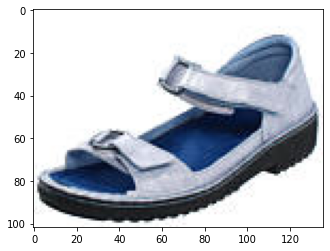

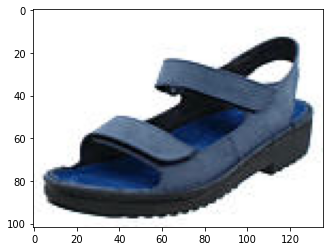

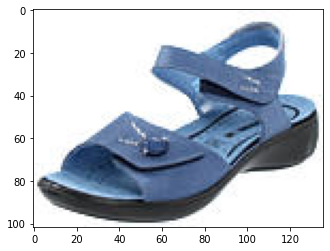

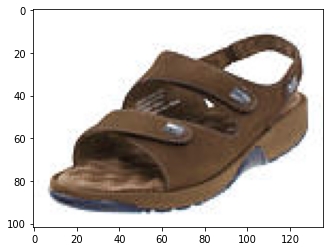

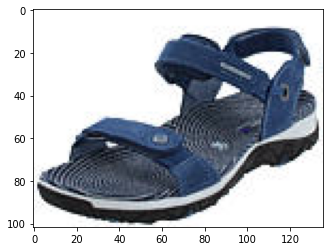

In [28]:
# let's test our function
recommend_shoe('/content/download_1.jpg')

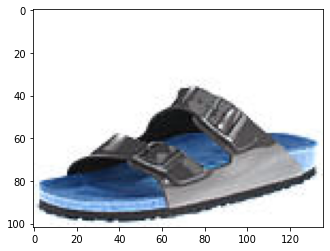

In [24]:
plt.imshow(cv2.imread(paths[1]))